In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq, fftshift, ifftshift

In [3]:
F = 5.
T = 20.    # The length of time determines the resolution of the FFT: how many bins per Hz (スペクトルの分解能)        
N = 10001  # The total number of points determines the resolution in time: bins per sec (関数の分解能)
           # This translates to the highest available frequency on the FFT
N = 2**20 # In general FFTs go faster if you do them over 2 to the power N points. (2の累乗が良い)

DT = T/N
t = np.linspace(0., T, N)
t[0:5]

array([0.00000000e+00, 1.90735045e-05, 3.81470090e-05, 5.72205136e-05,
       7.62940181e-05])

In [4]:
y = 2.*np.sin(2*np.pi*F*t) + 1.*np.sin(2*np.pi*2*F*t) + 0.5*np.sin(2*np.pi*4*F*t)

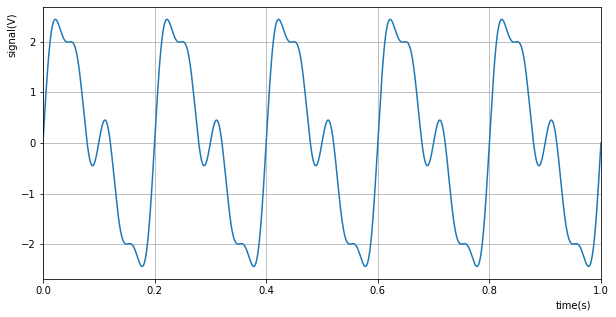

In [5]:
plt.figure(figsize = (10,5))
plt.plot(t,y)
plt.grid(True) #格子線
plt.xlabel("time(s)", position = (0.95,1)) #positionで位置を調整できる
plt.ylabel("signal(V)", position = (1, 0.9))
ax = plt.gca() # Get the current Axes.
ax.set_xlim(0., 1.)
plt.show()

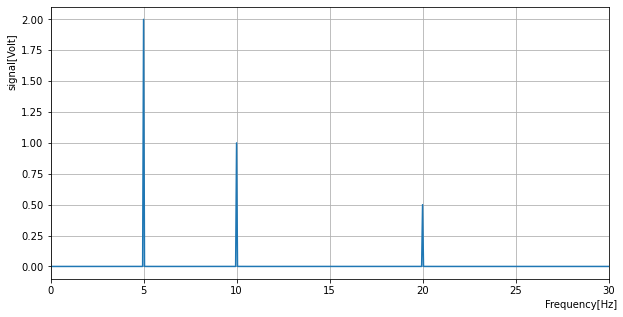

In [6]:
f_fft = fftshift(fftfreq(N,DT)) # Calculate the frequencies, and shift so that f = 0Hz is in the center
                                # fftshift switeches the order of array into [negative values,...,positive values]
                                #これでf軸を適当に生成できた
y_fft = fftshift(fft(y))        #Calculate the FFT, and also shift so that f = 0 Hz is in the center.
                                #これで関数列yをFFTする！
plt.figure(figsize = (10,5))
plt.plot(f_fft, 2./N*np.abs(y_fft)) # Note: the 2./N properly normalizes the FFT amplitudes to be in Volts.
plt.grid(True)                      # 注意："実関数なので"絶対値を取っている！！
ax = plt.gca()
ax.set_xlim(0, 30) # Zoom in: plot only from 0 to 30 Hz.
# plt.yscale("log") # Uncomment these to get a log-y scale.
# ax.set_ylim(1e-4, 1)
plt.xlabel("Frequency[Hz]", position = (0.95, 1))
plt.ylabel("Signal[Volt]", position = (1, 0.8))
plt.show()



In [7]:
# This inspects a sub set of the f_fft array, printing 10 of the values.
f_fft[int(len(f_fft)/2):int(len(f_fft)/2 + 10)] # intはint型にするだけ len()/2することで、中央の値から１０個取れる。

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45])

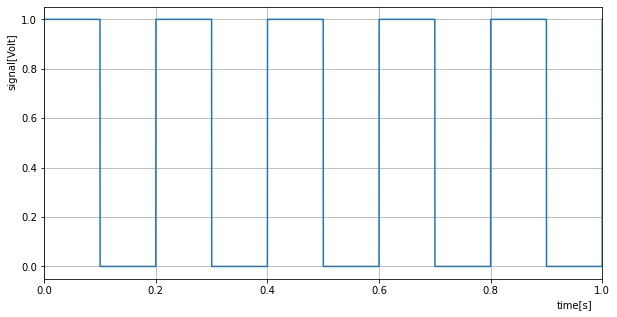

In [8]:
from scipy import signal
y_sq = 0.5+0.5*signal.square(2*np.pi*F*t) #scipy.signalは特定の波形関数を持っている
plt.figure(figsize = (10, 5))
plt.plot(t, y_sq)
plt.grid(True)
plt.xlabel("time[s]", position = (0.95, 1))
plt.ylabel("signal[Volt]", position = (1, 0.8))
ax = plt.gca()
ax.set_xlim(0, 1)
plt.show()

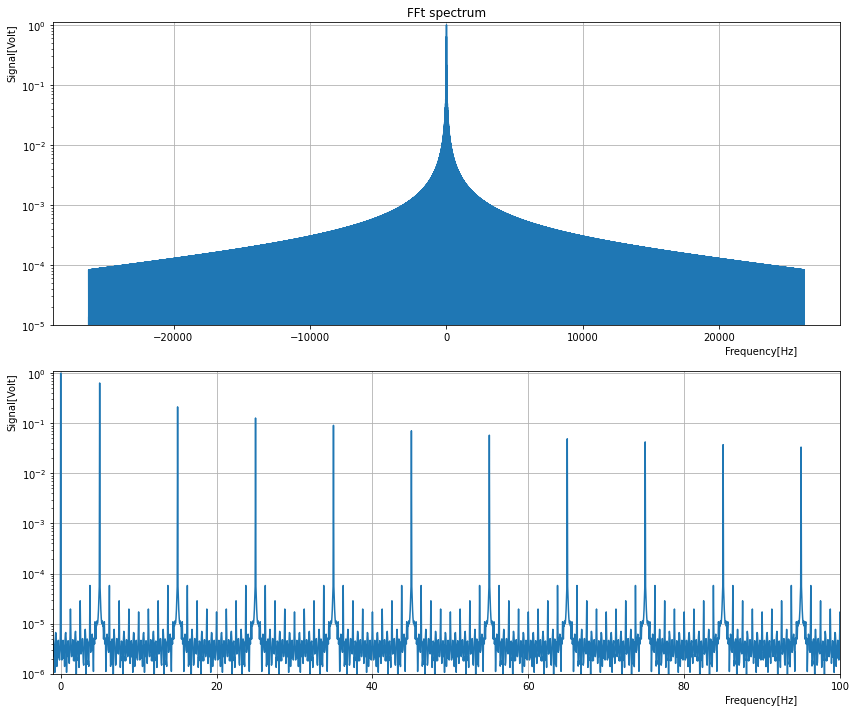

In [9]:
y_sq_fft = fftshift(fft(y_sq)) # Compute the FFT, and shift it so that f = 0 Hz is at the center(plots better)
plt.figure(figsize = (12, 10))
plt.subplot(2,1,1)
plt.semilogy(f_fft, 2./N*abs(y_sq_fft)) # Plot log y and normalize by 2/N so spectrum is in Volt.
plt.grid(True)
ax = plt.gca()
#ax.set_xlim(0, 100)
ax.set_ylim(1e-5, 1.1)
plt.title("FFt spectrum")
plt.xlabel("Frequency[Hz]", position = (0.9, 1))
plt.ylabel("Signal[Volt]", position = (1, 0.9))
plt.subplot(2, 1, 2)
plt.semilogy(f_fft, 2./N*np.abs(y_sq_fft))
plt.grid(True)
ax = plt.gca()
ax.set_xlim(-1, 100)
ax.set_ylim(1e-6, 1.1)
plt.xlabel("Frequency[Hz]", position = (0.9, 1))
plt.ylabel("Signal[Volt]", position = (1, 0.9))
plt.tight_layout() # Automatically adjust spacing between the 2 plots so they do not overlap
plt.show()

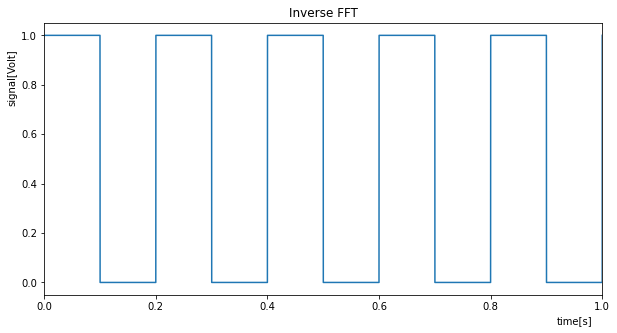

In [10]:
rev_fft = ifft(ifftshift(y_sq_fft))   # Un-shift the fft spectrum FIRST.
plt.figure(figsize = (10, 5))
plt.plot(t, np.abs(rev_fft)) #今の関数は常に正のはずなので絶対値を取っても問題ない
plt.title("Inverse FFT")
plt.xlabel("time[s]", position = (0.95, 1))
plt.ylabel("signal[Volt]", position = (1, 0.8))
ax = plt.gca()
ax.set_xlim(0, 1.)
plt.show()